In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

np.random.seed(1)

## Load dataset

In [5]:
train_set_x_orig, train_y, test_set_x_orig, test_y, classes = load_data()

y = [1], it's a 'cat' picture.


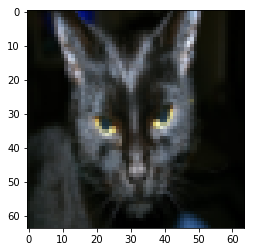

In [7]:
# Example of a pic
index= 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_y[:,index]) + ", it's a '" + classes[np.squeeze(train_y[:,index])].decode("utf-8") +  "' picture.")

In [8]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [9]:
m_train = train_y.shape[0]
m_test = test_y.shape[0]
num_px = train_set_x_orig.shape[1]

In [16]:
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

In [17]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [23]:
## two layer model
n_x = train_x.shape[0]
n_h = 7 # hyperparameters
n_y = 1
layer_dims=(n_x,n_h,n_y)

def two_layer_model(X,Y,layer_dims,lr=0.0075, num_iters = 3000,print_cost = False):
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layer_dims
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iters):
        #forward propagation
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        cost = compute_cost(A2,Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters,grads,lr)
        
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
            
     # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614824
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.1744831811255662
Cost after iteration 1600: 0.17080762978096686
Cost after iteration 1700: 0.11306524562164727
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726865
Cost after iteration 2000: 0.07439078704319083
Cost after iteration 2100: 0.0663074813

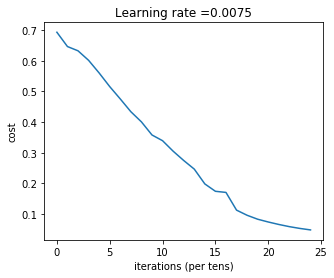

In [24]:
parameters = two_layer_model(train_x,train_y,layer_dims,num_iters =2500,print_cost=True)

In [26]:
# predict
predictions_train = predict(train_x,train_y,parameters)

Accuracy: 1.0


In [27]:
# predict the test samples
predictions_test = predict(test_x,test_y,parameters)

Accuracy: 0.72


**Note**: You may notice that running the model on fewer iterations (say 1500) gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614824
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.1744831811255662
Cost after iteration 1600: 0.17080762978096686
Cost after iteration 1700: 0.11306524562164727
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726865


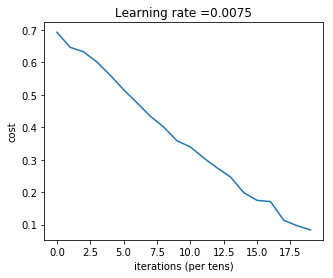

Accuracy: 0.72


In [31]:
parameters2 = two_layer_model(train_x,train_y,layer_dims,num_iters =2000,print_cost=True)
predictions_test_early_stop = predict(test_x,test_y,parameters2)

## multi-layer NN
above we use a nueral network with only one hidden layer to build the classification model  
then we apply more hidden layers

In [36]:
layer_dims = [12288, 20, 7, 5, 1] #  5-layer model

def L_layer_model(X,Y,layer_dims,num_iters=2500,lr =0.0075, print_cost=False):
    #1, initialize params
    L = len(layer_dims)
    parameters = initialize_parameters_deep(layer_dims)
    
    costs=[]
    #2. loop num_iters
    for i in range(num_iters):
        #3. in one iteration
        #(1) forward_propagation
        AL, caches = forward_prop(X,parameters)
        
        #(2) compute cost
        cost = compute_cost(AL,Y)
        
        #(3) back propagation
        grads = backward_prop(AL,Y,caches)
        
        #(4) update parameters
        parameters = update_parameters(parameters,grads,lr)
        
        #(5) print cost 
        
        if print_cost and i%100 ==0:
            print('Cost after iteration {}: {}'.format(i, np.squeeze(cost)))
        if i%100 ==0:
            costs.append(cost)
            
    #(6) plot cost graph
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(lr))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.54013766345478
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.4654773771766851
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268134
Cost after iteration 1300: 0.19960120532208647
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.16118854665827753
Cost after iteration 1600: 0.14821389662363324
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.1297401754919012
Cost after iteration 1900: 0.12122535068005211
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.1078392852

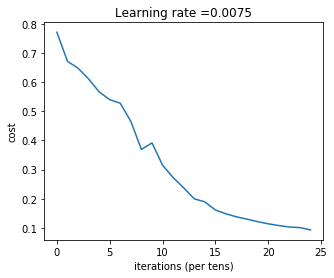

In [37]:
param_deep = L_layer_model(train_x,train_y,layer_dims,num_iters =2500,print_cost =True)

In [38]:
predictions_train = predict(train_x,train_y,param_deep)
predictions_test = predict(test_x,test_y,param_deep)

Accuracy: 0.985645933014
Accuracy: 0.8


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


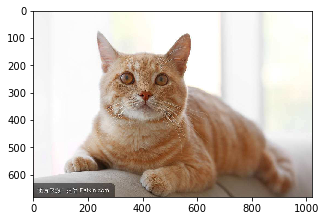

In [42]:
# ## 7) Test with your own image (optional/ungraded exercise) ##
# 
# Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
#     1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
#     2. Add your image to this Jupyter Notebook's directory, in the "images" folder
#     3. Change your image's name in the following code
#     4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

# In[25]:

## START CODE HERE ##
my_image = "my_image.png" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, param_deep)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
